# Homework 2 - Algorithmic Methods of Data Mining
### Giorgia Fontana - 
### Alex Onofri- 
### Braulio Villalobos - 

In [ ]:
# Package Import
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/steam_reviews.csv")
df.head(10)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0.0,0,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,0.0,0,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
7,7,292030,The Witcher 3: Wild Hunt,85183602,turkish,.\n,1611378312,1611378312,True,0,0,0.0,0,True,False,False,76561199084188849,9,1,2701.0,0.0,2701.0,1.609671e+09
8,8,292030,The Witcher 3: Wild Hunt,85183227,schinese,年度最佳的作品，没啥好夸的，神作,1611377703,1611377703,True,0,0,0.0,0,True,False,False,76561198130808993,581,17,6921.0,222.0,6921.0,1.611317e+09
9,9,292030,The Witcher 3: Wild Hunt,85182785,spanish,great game,1611377005,1611377005,True,0,0,0.0,0,True,False,False,76561198301724112,38,5,2399.0,333.0,2364.0,1.611379e+09


# [RQ1]: Exploratory Data Analysis (EDA)

Our dataset to analyze is composed of 23 columns or features and 21.747.371 observations. 

In [ ]:
df.shape

(21747371, 23)

With the info command we identify the types of variables. 


Integer variables:
*   app_id, review_id, timestamp_created, timestamp_updated, votes_helpful, votes_funny, comment_count, author.steamid, author.num_gaes_owned, author.num_reviews

String variables:
*   app_name, language, review

Float variables:
*   weighted_vote_score, author.playtime_forever, author.playtime_last_two_weeks, author.playtime_at_review, author.last_played

Boolean variables:

*   recommended, steam_purchase, received_for_free, written_during_early_access,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

Description of the numerical values: 

In [ ]:
df[:1:].describe()

,Unnamed: 0,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,1.000000e+00
mean,0.0,85185598.0,0.0,0.0,0.0,0.0,7.656120e+16,6.0,2.0,1909.0,1448.0,1909.0,1.611343e+09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,85185598.0,0.0,0.0,0.0,0.0,7.656120e+16,6.0,2.0,1909.0,1448.0,1909.0,1.611343e+09
25%,0.0,85185598.0,0.0,0.0,0.0,0.0,7.656120e+16,6.0,2.0,1909.0,1448.0,1909.0,1.611343e+09
50%,0.0,85185598.0,0.0,0.0,0.0,0.0,7.656120e+16,6.0,2.0,1909.0,1448.0,1909.0,1.611343e+09
75%,0.0,85185598.0,0.0,0.0,0.0,0.0,7.656120e+16,6.0,2.0,1909.0,1448.0,1909.0,1.611343e+09
max,0.0,85185598.0,0.0,0.0,0.0,0.0,7.656120e+16,6.0,2.0,1909.0,1448.0,1909.0,1.611343e+09


### Null Values

* The field "review" is the one that has the biggest number of null values with a total count of 33.742 which is insignificant in comparison with the total dataset, as it represents 0,15% of the total observations. Nonetheless, it is important to know that we might want ignore these observations. 

* The feature "author.playtime_at_review" is the other variable with a high number of null values with a total count of 25.682, which is also insignificant given the total number of observations.

### Analysis one-by-one variable

#### 1) App_id: 
It refers to the unique identifier of the reviewed applications. 

In [ ]:
# We have 315 different apps
df.app_id.nunique()

315

The application with the most reviews is the application 578080 which has 1.644.255 (7.5% of the total reviews). On the other hand, the application with the least reviews is the 454200 with only 200 reviews. 

In [ ]:
# The application with the most reviews 
most_reviews = pd.DataFrame(df['app_id'].value_counts()).reset_index()
most_reviews = most_reviews.rename(columns={'index': 'app_id', 0: 'number_reviews'})

In [ ]:
most_reviews.head(5)

,app_id,app_id
0,578080,1644255
1,271590,1019116
2,359550,841918
3,105600,672815
4,4000,655524


In [ ]:
most_reviews.tail(5)

,app_id,app_id
310,611760,1013
311,619290,700
312,385560,700
313,574050,600
314,454200,200


#### 2) App_name: 
It refers to the name of each application reviewed. If we count the number of unique app names, we validate that it's the same number of unique application id. This means we can work either with the app_id or the app_name, since there're not different names for a single application_id. 

In [ ]:
df.app_name.nunique()

315

We can identify the names of the 5 most/least reviewed applications

In [ ]:
most_reviews_name = pd.DataFrame(df['app_name'].value_counts()).reset_index().rename(columns={'index': 'app_name', 0: 'number_reviews'})
most_reviews_name.head()

,app_name,app_name
0,PLAYERUNKNOWN'S BATTLEGROUNDS,1644255
1,Grand Theft Auto V,1019116
2,Tom Clancy's Rainbow Six Siege,841918
3,Terraria,672815
4,Garry's Mod,655524


In [ ]:
most_reviews_name.tail()

,app_name,app_name
310,Don't Escape: 4 Days to Survive,1013
311,Out of the Park Baseball 19,700
312,Shadow Complex Remastered,700
313,DRAGON QUEST HEROES™ II,600
314,Neon Hardcorps,200


Something that might be important is that we can notice that the app_names do not necessarily follow the same way of naming. This means some of them might have their names just in upper case letters (like PlayerUnknown Battleground) or include some strange simbols (like Dragon Quest Heroes Tm). We should take this into consideration if we plan to do an analysis based on the application names and therefore consider some type of standardization. For this reason, it's easier to work with the app_id, since this feature is standard and doesn't have the described problems. 

#### 3) Review_id: 

It is apparentely the unique identifier of each review. If it is in fact a unique identifier, it should match the total number of reviews, which would mean that there're not more than 1 reviews with the same review_id

In [ ]:
df.review_id.nunique()

21612444

In [ ]:
reviews_ids = df['review_id'].to_frame().reset_index()
reviews_ids = reviews_ids.rename(columns = {'index':'index',0:'review_id'})

In [ ]:
duplicate_reviews_ids = reviews_ids[reviews_ids.duplicated(['review_id'])]
duplicate_reviews_ids

,index,review_id
21471076,21471076,84774500
21471077,21471077,84774347
21471078,21471078,84774076
21471079,21471079,84773959
21471080,21471080,84773690
...,...,...
21605998,21605998,85173193
21605999,21605999,85173033
21606000,21606000,85172460
21606001,21606001,85172260


In [ ]:
duplicate_reviews_ids['review_id'].unique()

array([84774500, 84774347, 84774076, ..., 85172460, 85172260, 85171647])

#### 4) Language: 

Language in which the review was written. We have 28 different languages. 

In [ ]:
import matplotlib.pyplot as plt
df.language.nunique()

28

In [ ]:
top_languages = pd.DataFrame(df['language'].value_counts()).reset_index()
top_languages = top_languages.rename(columns={'index': 'languages', "language": 'number_reviews'})
top_languages

,languages,number_reviews
0,english,9635437
1,schinese,3764967
2,russian,2348900
3,brazilian,837524
4,spanish,813320
5,german,752596
6,turkish,635868
7,koreana,613632
8,french,541751
9,polish,495529


The next graph allows us to visualize which are the most and least common languages among the reviews. We can clearly identify how the number of reviews made in english are more than twice the number of reviews in chinese (which is the second most common language). We can also visually identify at least 3 different groups of reviews by language: 

* The most common languages: composed by english, chinese and russian
* Languages with a significant amount of reviews but considerably less than the top 3: brazilian, spanish, german, turkish, koreana, french and polish. 
* The least common languages which represent: tchinese, czech, italian...

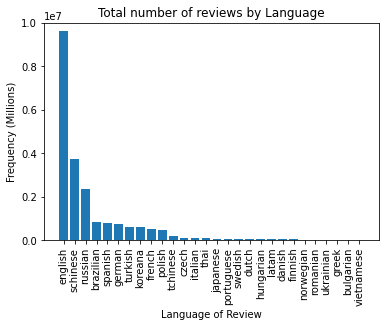

In [ ]:
diff_languages = top_languages['languages']
number_reviews = top_languages['number_reviews']
width = 0.8

fig, ax = plt.subplots()
rects1 = ax.bar(diff_languages, number_reviews, width)

ax.set_ylim(0,10000000)
ax.set_ylabel("Frequency (Millions)")
ax.set_xlabel("Language of Review")
ax.set_title("Total number of reviews by Language")

plt.xticks(rotation = 90)
plt.show()

#### 5) Review: 

It's the given review, therefore a chain of strings. This field could be used to do a sentiment analysis over the reviews given for each application. 

#### 6) Timestamp_created: 

Refers to the time when the review was created. This was given in unix format but transformed into a readable timestamp. 

In [ ]:
creation_time = df['timestamp_created'].to_frame().reset_index()
creation_time = creation_time.rename(columns = {'index':'index','timestamp_created':'timestamp_created'})

In [ ]:
creation_time[['timestamp_created']].min(), creation_time[['timestamp_created']].max()

(timestamp_created    2010-11-19 20:17:16
 dtype: object, timestamp_created    2021-01-23 18:24:47
 dtype: object)

The oldest review of the dataset was made on 2010-11-19 while the most recent one was made on 2021-03-23. 

On the other hand,  we can see the majority of the reviews were created on 2020 and the number of reviews given each year has experimented an increasing trend. It is worth mentioning that visually we can appreciate that the increase in 2020 was greater than the previous increases that the platform has experimented. One hypothesis is that this happened because of the COVID19 lockdown, which made many people to stay home and be more active on the internet. 

We can't analyze any trend on 2021 since don't even have one complete month of data

In [ ]:
creation_time['year'] = pd.DatetimeIndex(creation_time['timestamp_created']).year

In [ ]:
reviews_by_year = creation_time.groupby(['year']).size().reset_index(name = 'number_reviews')

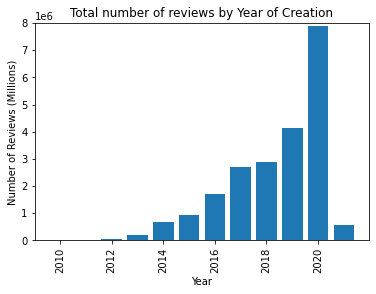

In [ ]:
years_to_picture = reviews_by_year['year']
number_reviews = reviews_by_year['number_reviews']
width = 0.8

fig, ax = plt.subplots()
rects1 = ax.bar(years_to_picture, number_reviews, width)
ax.set_ylim(0,8000000)
ax.set_ylabel("Number of Reviews (Millions)")
ax.set_xlabel("Year")
ax.set_title("Total number of reviews by Year of Creation")
plt.xticks(rotation = 90)
plt.show()

#### Timestamp_updated: 

It refers to the date and hour on which the review was last updated

#### Recommended: 

It is a boolean feature and tells if the review recommends or not the app. 

In [ ]:
recomm = pd.DataFrame(df['recommended'].value_counts()).reset_index()
recomm = recomm.rename(columns = {'index':'recommended','recommended':'number_reviews'})

In [ ]:
recomm['perc']= round((recomm['number_reviews']/sum(recomm['number_reviews']))*100,1)
recomm

,recommended,number_reviews,perc
0,True,19022610,87.5
1,False,2724761,12.5


The vast majority of the reviews recommend the application they are reviewing.

#### Votes_helpful: 

It indicates the number of votes that have classified the review as "helpful".

In [ ]:
helpful_votes = pd.DataFrame(df['votes_helpful'].value_counts()).reset_index()

In [ ]:
helpful_votes.sort_values(['index'])

,index,votes_helpful
0,0,15642127
1,1,3478106
2,2,1083373
3,3,449848
4,4,235425
...,...,...
2030,26149,1
1977,28211,1
1990,29608,1
1993,4398046511104,1


#### Votes_funny: 

It indicates the number of votes that have classified the review as "funny"

In [ ]:
funny_votes = pd.DataFrame(df['votes_funny'].value_counts()).reset_index()
funny_votes.sort_values(['index'])

,index,votes_funny
0,0,19144299
1,1,1719903
2,2,381143
3,3,144356
4,4,74835
...,...,...
786,4294967291,5
529,4294967292,10
381,4294967293,20
215,4294967294,58


#### Weighted_vote_score: 
The weighted score is a weighted measure based on the number of helpful votes each review has received. The variable takes values from 0 to 1. 

In [ ]:
weighted_score_df = pd.DataFrame(df['weighted_vote_score'].value_counts()).reset_index()
weighted_score_df = weighted_score_df.rename(columns = {'index':'weighted_score',0:'reviews'})

In [ ]:
weighted_score_df.weighted_score.max()

0.9959867596626278

#### Comment_count: 
It indicates the number of comments that each review has received. Only approximately 5% of the total reviews received at least one comment. In a hypothetical case, if Steam would be interested into implementing an strategy to increase the interaction of the users throught the reviews, this could be an important variable to measure the impact of the said strategy. 

In [ ]:
count_comment = pd.DataFrame(df['comment_count'].value_counts()).reset_index()
count_comment = count_comment.rename(columns = {'index':'number_comments',0:'number_reviews'})
count_comment.head(10)

,number_comments,comment_count
0,0,20765523
1,1,560995
2,2,181151
3,3,77637
4,4,43725
5,5,27162
6,6,18335
7,7,13056
8,8,9650
9,9,7186


#### Steam_purchase: 
This variable is of boolean type and indicates if the author of the review purchased the app (true) or not (false). In this case, 77.4% (more than 3/4) of the authors of the reviews said that they have purchased the app. 

In [ ]:
purchased_steam = pd.DataFrame(df['steam_purchase'].value_counts()).reset_index()
purchased_steam = purchased_steam.rename(columns = {'index':'purchased_app',"steam_purchase":'number_reviews'})
purchased_steam['perc'] = round((purchased_steam['number_reviews']/len(df))*100,1)
purchased_steam

,purchased_app,number_reviews,perc
0,True,16842432,77.4
1,False,4904939,22.6


#### Received_for_free: 
This variable indicates if the author of the review received the app for free or not. Just 3.2% of the total reviewers said they had received the app for free. 

In [ ]:
for_free = pd.DataFrame(df['received_for_free'].value_counts()).reset_index()
for_free = for_free.rename(columns = {'index':'free_received',"received_for_free":'number_reviews'})
for_free['perc'] = round((for_free['number_reviews']/len(df))*100,1)
for_free

,free_received,number_reviews,perc
0,False,21059310,96.8
1,True,688061,3.2


#### Written_during_early_access: 
This variable indicates if the review was written during early access or not. As the last two variables, this is also of boolean type. Early access refers to a funding model in the videogames environment in which players are allowed to play preliminary versions of the final game in exchange for money, which is used by the creater of the videograme to continue developing the game until its final version. 

That being said, almost 91% of the reviewers responded negatively to this question, which means they wrote the review while playing the final version of the videogame. 

In [ ]:
early_access = pd.DataFrame(df['written_during_early_access'].value_counts()).reset_index()
early_access = early_access.rename(columns = {'index':'early_access',"written_during_early_access":'number_reviews'})
early_access['perc'] = round((early_access['number_reviews']/len(df))*100,1)
early_access

,early_access,number_reviews,perc
0,False,19730986,90.7
1,True,2016385,9.3


#### Author.steamid: 
This is a unique identificator of the author of the review. We have 12.4 million unique authors of reviews. 

In [ ]:
df['author.steamid'].nunique()

12406560

#### Author.num_games_owned: 
The variable indicates the quantity of games that the author of each review owns. 

In [ ]:
num_games = df['author.num_games_owned'].to_frame().reset_index()
num_games = num_games.rename(columns = {'author.num_games_owned':'num_games_owned'})

The max number of games owned by the author of a review appears to be incorrect since it is a considerable big number.

In [ ]:
num_games.num_games_owned.max(),num_games.num_games_owned.min()

(4398046511619, 0)

At the beginning of this EDA we found that there were 315 unique games that were reviewed in the dataset. Therefore, if this variable refers to the number of games *within the Steam platform* that were owned by the author of each review, there shouldn't be authors with more than 315 games owned. 

In [ ]:
num_games[num_games.num_games_owned > 315]

,index,num_games_owned
8,8,581
13,13,501
119,119,1284
125,125,500
128,128,379
...,...,...
21747355,21747355,461
21747357,21747357,383
21747361,21747361,363
21747362,21747362,958


If we count the number of reviews made by authors that claimed they owned more than 315 games, this gives us a result of 2,027,670 reviews. This means that the variable author.num_games is incorrect in a significant number of reviews or it doesn't refer to the number of only Steam apps owned by the author of the review but to the total number of games that the author owns, regardless if they're on Steam. Still the max number of videogames doesn't make sense so this variable might not be realiable to further analyses. 

In [ ]:
df[df["author.num_games_owned"] == 4398046511619]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
5502449,5502450,1158310,Crusader Kings III,80957958,english,noice,1606605891,1606605891,True,0,0,0.0,0,False,False,False,76561198039421205,4398046511619,5,2728.0,546.0,2157.0,1.609966e+09


#### Author.num_reviews: 
It refers to the total number of lifetime app reviews made by the author. 

#### Author.playtime_forever: 
Refers to the lifetime playtime of the reviewed app by the author. It is not clear if this variable is expressed in minutes, hours or which time measure. 

#### Author.playtime_last_two_weeks
If refers to how much time (again without clarity on which measure the variable is in) the author has spent playing the app on the last two weeks.

#### Author.playtime_at_review
It refers to how much time the author has spent playing the app at the moment the review was made. 

#### Author.last_played
It refers to when was the last day the author played the reviewed app. 

# [RQ2]

### Plot the number of reviews for each application in descending order.

578080    1644255
271590    1019116
359550     841918
105600     672815
4000       655524
252490     549074
252950     498565
218620     487747
945360     485293
292030     469395
381210     418897
346110     400009
227300     387553
413150     315717
72850      294966
431960     292790
582010     290946
367520     269854
242760     239734
322330     238636
374320     235422
620        232329
377160     228957
739630     219090
239140     214431
107410     182348
275850     182045
203160     181054
8930       171404
264710     152414
Name: app_id, dtype: int64


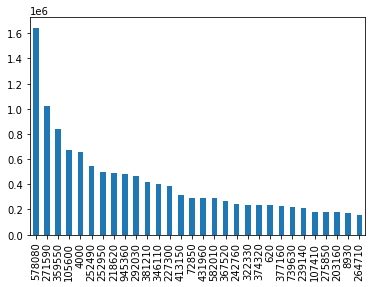

In [ ]:
number_reviews = df['app_id'].value_counts()[:30] #number of reviews for the first 30 applications, sort in descending order
ax = number_reviews.plot.bar()
print(number_reviews) 

above we can see the number of reviews for the first 30 applications, sort in descending order. In particular, in the left column we have the id for the first 30 applications and in the right column we have the number of reviews associated to the corresponding application. In the graph we can see these values plotted with a vertical bar plot.

### What applications have the best Weighted Vote Score?

In [ ]:
weighted_score_df= df.groupby('app_name')['weighted_vote_score'].max() #best weighted vote score for each application
s=weighted_score_df.sort_values(ascending=False) #sort the values in descending order
print(s.head(5)) #the first 5 applications with the best weighted vote score


app_name
Stardew Valley              0.995987
Divinity: Original Sin 2    0.995245
Subnautica                  0.994453
Mirror                      0.994038
Wallpaper Engine            0.993540
Name: weighted_vote_score, dtype: float64


as we can see, in this exercise I take the best weighted vote score for each application and then I print the first 5 application (in the left column) with their best weighted vote score (in the right column) 

### Which applications have the most and the least recommendations?

In [ ]:
app=df.groupby('app_name',as_index=False)['recommended'].sum() #count of the recommendations for each app
s = app.sort_values(by="recommended",ascending=False) #sort the values in descending order
print("app with the most recommendations\n")
print(s.head(1)) #app with the most recommendations
print("\napp with the least recommendations\n")
print(s.tail(1)) #app with the least recommendations

app with the most recommendations

                          app_name  recommended
182  PLAYERUNKNOWN'S BATTLEGROUNDS       886417

app with the least recommendations

           app_name  recommended
164  Neon Hardcorps           89


as we can see, the application with the most recommendations is PLAYERUNKNOWN'S BATTLEGROUNDS, with 886417 of recommendations. Instead the application with the least recommendations is Neon Hardcorps, with only 89 recommendations.

### How many of these applications were purchased, and how many were given for free?

In [ ]:
#get only the columns "app_name" and "received_for_free"
df_free = df[['app_name', 'received_for_free']]
df_purch = df[['app_name', 'steam_purchase']]
print('data for the applications that have the most recommendations:\n')
# get the name of the most and least recommendend 
top=s.head(1).iloc[0,0]
last=s.tail(1).iloc[0,0]
#print how many copy of "top app" are given for free
print("given for free:")
print(df.loc[df_free['app_name'] ==	top ]['received_for_free'].value_counts())
print('\n')
#print how many copy of "top app" are purchased
print("purchased:")
print(df.loc[df_purch['app_name'] ==	top ]['steam_purchase'].value_counts())
print('\n')

print('data for the applications that have the least recommendations:\n')
#print how many copy of "last app" are given for free
print("given for free:")
print(df.loc[df_free['app_name'] ==	last ]['received_for_free'].value_counts())
print('\n')
#print how many copy of "last app" are purchased
print("purchased:")
print(df.loc[df_purch['app_name'] ==	last ]['steam_purchase'].value_counts())
print('\n')


data for the applications that have the most recommendations:

given for free:
False    1582812
True       61443
Name: received_for_free, dtype: int64


purchased:
True     1372721
False     271534
Name: steam_purchase, dtype: int64


data for the applications that have the least recommendations:

given for free:
False    173
True      27
Name: received_for_free, dtype: int64


purchased:
False    171
True      29
Name: steam_purchase, dtype: int64




in this exercise we can see the data for the applications that have the most and the least recommendations (mentioned in the previous question). In particular, we can see how many copy of "top app" are given for free, how many are purchased, and the same for the "last app".

# [RQ3]
### RQ3 - What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [ ]:
# apply a lambda on "timestamp_created" column values that convert them in the corresponding strings of hours and minutes
# use these values to create a new column called "time_creation"
df['time_creation']= df.timestamp_created.apply(lambda x: datetime.fromtimestamp(x).strftime(("%H:%M")))
# group by 'time_creation' values
# for each of that values count the number of reviews that has that hours and minutes as a creation time
# sort that values in descending order an take the first value that corresponds to the most commont
df.groupby('time_creation', as_index=False).app_id.count().sort_values("app_id",ascending=False).head(1)["time_creation"].iloc[0]

'14:50'

As we can see the most common time when authors review an application is "14:50"

### RQ3 - Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

In [ ]:
def intervals_reviews(intervals):
  # list that will contains the results for each interval"
  reviews=[]
  # apply a lambda on "timestamp_created" column values that convert them in the corresponding strings of hours, minutes and seconds
  # use these values to create a new column called "time_creation"
  df['time_creation']= df.timestamp_created.apply(lambda x: datetime.fromtimestamp(x).strftime(("%H:%M:%S")))
  # for each interval received in input count the number of reviews that have been created in that interval
  for i in intervals:
    reviews.append(df.loc[(df["time_creation"] >= i[0]) & (df["time_creation"] <= i[1])]['time_creation'].count())
  # convert the intervals in string to use them in the plot
  intervals=list(map(str,intervals))
  # plot the results on a bar plot
  plt.bar(intervals, reviews, color ='red',
        width = 0.4)
  plt.xticks(rotation='vertical')
  plt.xlabel("Intervals")
  plt.ylabel("Number of reviews")
  plt.title("Number of reviews for different time intervals")
  plt.show()

### RQ3 - Use the function that you created in the previous literal to plot the number of reviews between the following time intervals



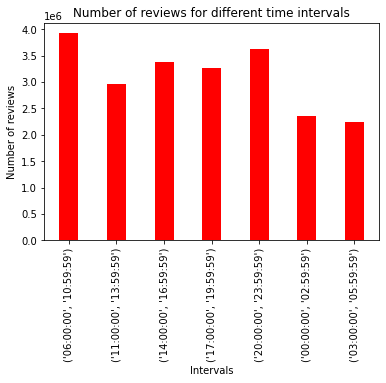

In [ ]:
#apply the funcion previously created using the intervals given in the table as input
intervals_reviews([("06:00:00","10:59:59"),("11:00:00","13:59:59"),("14:00:00","16:59:59"),("17:00:00","19:59:59"),("20:00:00","23:59:59"),("00:00:00","02:59:59")
,("03:00:00","05:59:59")])

As we can see from the graph, the time interval more "popular" to do a review is between 6 am and 11 am. On the other hand, the time interval when is less common doing a review is from 3 am to 6 am.

It's curious to compare the results obtained here and the ones obtained on the first point of this exercise. In fact, even if the most common time for doing a review resulted to be "14:50", the time intervals that contain it is not the most popular one but rather the third one.

# [RQ4]
### RQ4 - What are the top 3 languages used to review applications?

In [ ]:
top_languages = pd.DataFrame(df['language'].value_counts()).reset_index()
top_languages = top_languages.rename(columns={'index': 'languages', 'language': 'number_reviews'})

In [ ]:
top_languages.head(3)

,languages,number_reviews
0,english,9635437
1,schinese,3764967
2,russian,2348900


The top 3 languages used to review applications are english, chinese and russian. 

### RQ4 - Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [ ]:
def filter_languages_f(dataset_name, languages_to_filter):
    #check if languages_to_filter parameter is actually a list
    if(isinstance(languages_to_filter,list)):
        filtered_dataset = dataset_name[dataset_name['language'].isin(languages_to_filter)]
    else:
        print('Must enter the desired languages to be filtered in a list format')
    
    return filtered_dataset

In [ ]:
filter_languages_f(df,['english','russian']).head(5)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0.0,0,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,0.0,0,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
11,11,292030,The Witcher 3: Wild Hunt,85182372,russian,"Шикарная игра с отличным сюжетом, неплохой гра...",1611376281,1611376281,True,0,0,0.0,0,True,False,False,76561198257031328,11,2,508.0,508.0,348.0,1.611387e+09
13,13,292030,The Witcher 3: Wild Hunt,85181146,russian,Замечательная карточная игра в антураже фэнтез...,1611374238,1611374309,True,0,0,0.0,0,True,False,False,76561197987104694,501,23,7310.0,0.0,7310.0,1.525555e+09


### RQ4 - Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [ ]:
filtered_languages = filter_languages_f(df,['english','russian','schinese'])
filtered_languages_funny = filtered_languages[filtered_languages['votes_funny'] != 0]
filtered_languages_funny = pd.DataFrame(filtered_languages_funny['language'].value_counts()).reset_index()
filtered_languages_funny = filtered_languages_funny.rename(columns={'index':'languages','language':'number_funny_reviews'})

In [ ]:
filtered_languages_funny.head()

,languages,number_funny_reviews
0,english,1085997
1,schinese,444945
2,russian,391784


In [ ]:
percent_funny = top_languages.merge(filtered_languages_funny)
percent_funny['percent_funny'] = round((percent_funny['number_funny_reviews']/percent_funny['number_reviews'])*100,1)
percent_funny

,languages,number_reviews,number_funny_reviews,percent_funny
0,english,9635437,1085997,11.3
1,schinese,3764967,444945,11.8
2,russian,2348900,391784,16.7


* Based on the last table, we can affirm that from the top 3 languages in terms of total number of reviews, the language with the most reviews categorized as funny is Russian, where 16.7% of the total reviews made in Russian were classified as funny at least once. 
* In the case of the reviews made in chinese and english language, 11.8% and 11.3% of the total reviews made in each language were classified as funny. 
* Based on this we could affirm that apparently even though russian reviews are not as numerous as the ones made in english, they in relative means funnier than those made in english. 

### RQ4 - Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [ ]:
filtered_languages_helpful = filtered_languages[filtered_languages['votes_helpful'] != 0]
filtered_languages_helpful = pd.DataFrame(filtered_languages_helpful['language'].value_counts()).reset_index()
filtered_languages_helpful = filtered_languages_helpful.rename(columns={'index':'languages','language':'number_helpful_reviews'})

      index  language
0   english   2813873
1  schinese    945157
2   russian    833896


In [ ]:
percent_helpful = top_languages.merge(filtered_languages_helpful)
percent_helpful['percent_helpful'] = round((percent_helpful['number_helpful_reviews']/percent_helpful['number_reviews'])*100,1)
percent_helpful

,languages,number_reviews,number_helpful_reviews,percent_helpful
0,english,9635437,2813873,29.2
1,schinese,3764967,945157,25.1
2,russian,2348900,833896,35.5


## **************Missing interpretation!!

# [RQ5]

### RQ5 - Plot the top 10 most popular reviewers and the number of reviews.

76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
Name: author.steamid, dtype: int64


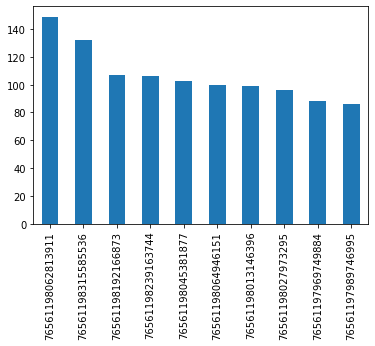

In [ ]:
top_10_authors=df['author.steamid'].value_counts()[:10]#count of the number of reviews for each reviewers, sort in descending order
ax = top_10_authors.plot.bar()
most_popular = top_10_authors.index.tolist()[0]
print(top_10_authors)

above we can see the top 10 most popular reviewers and the number of reviews sort in descending order. In particular, in the left column we have the author steam id and in the right column we have the number of reviews associated to the corresponding reviewers. In the graph we can see these values plotted with a vertical bar plot.

### RQ5 - What applications did the most popular author review?

In [ ]:
df_pop =df[['author.steamid', 'app_name']]
c=df_pop.loc[df_pop['author.steamid']==	most_popular] #select rows from df based on values in some column
print(c.groupby('app_name').groups.keys())

dict_keys(['A Hat in Time', 'ARK: Survival Evolved', 'Age of Empires II (2013)', 'Age of Empires: Definitive Edition', 'American Truck Simulator', 'Among Us', 'Ancestors Legacy', 'Axiom Verge', 'Banished', 'BattleBlock Theater', 'BioShock Infinite', 'Black Desert Online', 'Black Mesa', 'Blackwake', 'Bomber Crew', 'Broforce', 'Castle Crashers', 'Cave Story+', 'Celeste', 'Cities: Skylines', 'Conan Exiles', 'Counter-Strike: Source', 'Cuphead', 'DARK SOULS™ III', 'DOOM', 'DOOM Eternal', 'DUSK', 'Darksiders III', 'Day of Infamy', 'Dead Cells', 'Dead Rising 4', 'Dead by Daylight', 'Deep Rock Galactic', 'Devil May Cry HD Collection', 'Dishonored', "Don't Escape: 4 Days to Survive", "Don't Starve", 'Duck Game', 'Dying Light', 'Enter the Gungeon', 'Euro Truck Simulator 2', 'Europa Universalis IV', 'FAR: Lone Sails', 'FTL: Faster Than Light', 'Factorio', 'Fallout 4', 'Finding Paradise', 'Foundation', 'Frostpunk', 'GRIS', "Garry's Mod", 'Getting Over It with Bennett Foddy', 'Ghost of a Tale', 'Gu

above we can see the name of the applications that did the most popular author

### RQ5 - How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [ ]:
df_free = df[['author.steamid', 'steam_purchase']]
tot_p=df_free.loc[df_free['author.steamid'] ==	most_popular].value_counts()
perc_p=df_free.loc[df_free['author.steamid'] ==	most_popular].value_counts(normalize=True)#By setting normalize=True, the object returned will contain the relative frequencies of the unique values. The normalize parameter is set to False by default.
print(tot_p)
print(perc_p)
df_free = df[['author.steamid', 'received_for_free']]
tot_f=df_free.loc[df_free['author.steamid'] ==	most_popular].value_counts()
perc_f=df_free.loc[df_free['author.steamid'] ==	most_popular].value_counts(normalize=True)
print(tot_f)
print(perc_f)

author.steamid     steam_purchase
76561198062813911  True              110
                   False              39
dtype: int64
author.steamid     steam_purchase
76561198062813911  True              0.738255
                   False             0.261745
dtype: float64
author.steamid     received_for_free
76561198062813911  False                145
                   True                   4
dtype: int64
author.steamid     received_for_free
76561198062813911  False                0.973154
                   True                 0.026846
dtype: float64


above we can see how many applications the most popular author purchased and how many he received for free (in particular we can see the number of applications and the percentage).

### RQ5 - How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [ ]:
df_rev = df[['author.steamid', 'received_for_free', 'recommended']]
a=df_rev.loc[((df_rev['author.steamid'] ==	most_popular) & (df_rev['received_for_free']==False))].value_counts()
print('applications reviewed positively purchased by the most popular author\n{}.'.format(a))
b=df_rev.loc[((df_rev['author.steamid'] ==	most_popular) & (df_rev['received_for_free']==True))].value_counts()
print('\napplications reviewed positively that the most popular author received for free\n{}.'.format(b))

applications reviewed positively purchased by the most popular author
author.steamid     received_for_free  recommended
76561198062813911  False              True           142
                                      False            3
dtype: int64.

applications reviewed positively that the most popular author received for free
author.steamid     received_for_free  recommended
76561198062813911  True               True           4
dtype: int64.


above we can see the number of applications reviewed positively purchased by the most popular author and then the number of applications reviewed positively that the most popular author received for free.

# [RQ6]

### RQ6 - What is the average time (days and minutes) a user lets pass before he updates a review?

In [ ]:
import math
# create a new column that contains the absolute value of the difference between the values of "timestamp_created" and "timestamp_updated"
df['time_before_update']= abs(df.timestamp_created- df.timestamp_updated)
# mean of the values in the column
mean=df.time_before_update.mean()
# calculation of the corresponding number of days (the timestamp is expressed in seconds and in a day there are 86400 seconds )
days=math.floor(mean/86400)
# calculation of the corresponding minutes of the remaning time
minutes=int((mean-(86400*days))/60)
print("the average time a user lets pass before he updates a review is: "+str(days)+" days and "+str(minutes)+" minutes")

the average time a user lets pass before he updates a review is: 36 days and 213 minutes


### RQ6 - Plot the top 3 authors that usually update their reviews.

author.steamid
76561198192166873    95
76561198206999976    61
76561198072450805    60
Name: review_id, dtype: int64


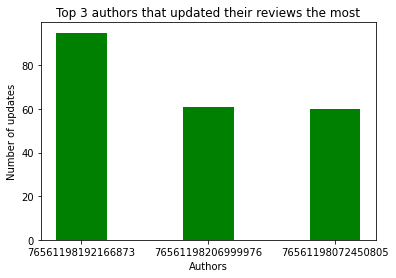

In [ ]:
# get only the rows of the reviews that have the timestamp of the creation different to the timestamp of the update
# group by the authors and count the number of reviews updated by each author
# sort the values in descending order and get the top 3
top3=df.loc[df.timestamp_created != df.timestamp_updated].groupby("author.steamid")["review_id"].count().nlargest(3)
print(top3)
# plot the result
plt.bar(list(map(str,top3.keys())), top3, color ='green',
        width = 0.4)
plt.xlabel("Authors")
plt.ylabel("Number of updates")
plt.title("Top 3 authors that updated their reviews the most")
plt.show()

The ones showed above are the top 3 authors that updated the reviews the most and, as we can see, the first one is strongly higher than the others (around 1/3 more) while the second and third are almost the same and differ just of 1 review.

# [RQ7]

### RQ7 - What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [ ]:
www = df['weighted_vote_score'].to_frame().reset_index()
www = www.rename(columns = {"weighted_vote_score":'weighted_score'})
(len(www[www['weighted_score']>=0.5])/len(www))

0.21998484322541792

The probability that a review has a weighted vote score equal or bigger than 0.5 is 22%. This is given by dividing the total number of reviews with a weighted_score greater or equal than 0.5 (the total number of successful occurences of the event we are studying) by the total number of reviews (the total number of possible outcomes). 

### RQ7 - What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

This is a conditional probability where we can define:
* Event A: as the probability that a review has at least one vote as funny
* Event B: as the probability that a review has a Weighted vote score bigger than 0.5

The probability of A given B, P(A|B), can be computed as the probability of A and B, P(A intersection B), divided by the Probability of B. 

In [ ]:
prob_event_b = round((len(www[www['weighted_score']>0.5])/len(www))*100,1)
prob_event_b

21.4

In [ ]:
prob_event_a_b = round((len(df[(df.weighted_vote_score > 0.5) & (df.votes_funny >= 1)])/len(df))*100,1)
prob_event_a_b

5.3

In [ ]:
prob_event_a_b/prob_event_b

0.24766355140186916

## Missing Interpretation!!

### RQ7 - Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [ ]:
len(df[df.votes_funny >= 1]) /len(df)

0.1196959393390585

If an Event A is independent of the Event B, this means that the P(A|B) = P(A). In this case this is not the case since the probability of P(A|B) is 24.7% and the P(A) is 11.9%. Therefore, the events are not independent. 

# [RQ8]

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In [ ]:
chinese_reviews = filter_languages_f(df,['schinese'])
russian_reviews = filter_languages_f(df,['russian'])

In [ ]:
chinese_reviews = chinese_reviews['weighted_vote_score'].to_frame().reset_index()
chinese_reviews = chinese_reviews.rename(columns = {'weighted_vote_score':'weighted_score'})
russian_reviews = russian_reviews['weighted_vote_score'].to_frame().reset_index()
russian_reviews = russian_reviews.rename(columns = {'weighted_vote_score':'weighted_score'})

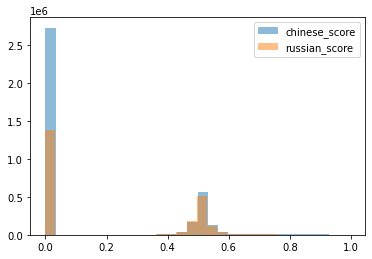

In [ ]:
from matplotlib import pyplot

chinese_score = chinese_reviews.weighted_score
russian_score = russian_reviews.weighted_score
#plt.hist(x, bins = 30)

pyplot.hist(chinese_score, 30, alpha=0.5, label='chinese_score')
pyplot.hist(russian_score, 30, alpha=0.5, label='russian_score')
pyplot.legend(loc='upper right')
pyplot.show()

One of the tests that we can carry out in order to evaluate if there's a significant difference of the weighted score between reviews made in Chinese and Russian is the t test. However, one of the assumptions this test has is that the data is normally distributed, as it is sensible to outliers. In the two last graphs we can appreciate how the data is not normally distributed as it has a significant amount of reviews with weighted_score equal to zero. Therefore, we shouldn't carry out a T test and we must search for other options. 

In [ ]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

# generate two independent samples
#data1 = 5 * randn(100) + 50
#data2 = 5 * randn(100) + 51
# compare samples
stat, p = mannwhitneyu(chinese_score, russian_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=3856768317304.500, p=0.000
Different distribution (reject H0)


### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

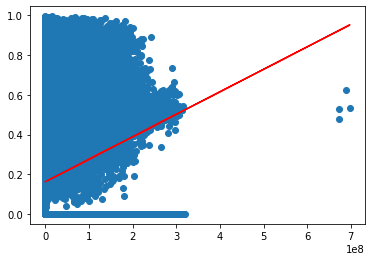

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array(df['time_before_update']).reshape((-1, 1))
y = np.array(df['weighted_vote_score'])
model = LinearRegression().fit(x, y)
y_pred = model.predict(x) 
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()




### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

### What are histograms, bar plots, scatterplots and pie charts used for?


- Histograms are used when in a dataset there are values in a defined range and it's a graph used to show graphically the distribution of this values (frequency of values).
In it, the values are usually divided in groups called bins and for each bins will correspond the rectangle high as much as we find observation that are in that interval of values.
In this way we will be able also to identify possible outliers or gaps in the distribution.
- Bar plots are used when we can divide the dataset in categories and we have a value for each of them, in this way we can use this type of graph to compare them visually.
So, even if it can look similar to histogram, has a compleatly different meaning and goal. 
- Scatter plots show points in the graph in relation to two different variables (one in the x-axis and one in the y-axis). For this reason it's used to find possibile correlations between that variables used. Furthermore, it can be a way to identify possible patterns in data or the presence of gap or outliers.
- Pie charts are used to analyze a single variable of the dataset. 
A pie chart groups the values in categories and shows for each of them the correspondent section of the pie, that represent the percentage of the total.
Thus, we use it to compare the different sizes of the categories in the dataset

### What insights can you extract from a Box Plot?

The Box Plot is used to check the distribution of values in a dataset, in fact it tells us information about Mean, superior and inferior quartile and max and min value.
The insights that we can extrat from box plot are:

-- any possible comparison between dataset using the values previously mentioned

-- information about the distribution of the values 

-- check if there are outliers 

# TQ1

1) This algorithm gets the k-ith element of the ordered list 
(at every iteration you do the ordering of the new list using the random value "s")

2) We have the worst case of this algorithm when at every iteration when:
  
  s: is always the second maximum value of the list

  k: is 1

  In this case, every time, the list will be reduced of 1 length until it will reach the length of 1.
  
  In this way the computational cost will be equal to the length of the list at each iteration
  
  O(n)+O(n-1)+O(n-2)..... = O(n^2)

3) We have the best case of this algorithm when k = r at the first iteration.
	in this case the computational cost correspond to the length of the list: n
	so is O(n)

# TQ2

1) The computational cost of the function swapList is O(n/2) 
and the cost of each call at the function splitSwap is T(n/2)
So the total computational cost will be: T(n/2) + T(n/2) + O(n/2) + 1

2) This algorithm reverses the position of "n" elements, skipping the first "l" ones.
In the case proposed in the previous exercise (l = 0), the algorithm simply reverse the order of the first "n" elements.
The values choose for "l" and "n" have to follow this condition: l + n <= len(a)
If the previous condition is not followed, the algorithm will raise an "out of range" error.

Example of execution:
a=[1,3,5,7]
l=0
n=4
- the first call to splitSwap operates on the first half of the list --> [1,3]
	- in this case both calls to splitSwap are executed but won't do anything, because the length of the list will be 1
	- apply swapList that reverse the order --> [3,1]
- the second call to splitSwap operates on the second half of the list --> [5,7]
	- in this case both calls to splitSwap are executed but won't do anything, because the length of the list will be 1
	- apply swapList that reverse the order --> [7,5]
- apply swapList on the complete list that has been modified by the previous recursion call
	the list is now [3,1,5,7] and applying the function will be --> [7,5,3,1]

# TQ3
In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:

1-Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded.

2-Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded.

3-Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded.

For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

### Solution

1.

n=6, W=100.

w_1=10, v_1=4

w_2=30, v_2=1

w_3=20, v_3=2

w_4=50, v_4=9

w_5=15, v_5=7

w_6=35, v_6=8



> If I order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded, I take obj1+obj5+obj3+obj2 getting W=75 and V=14,  but the optimal solution takes obj4+obj5+obj6 getting W=100 and V=24


2.

n=4, W=10.

w_1=8, v_1=8

w_2=4, v_2=5

w_3=3, v_3=3

w_4=3, v_4=1 



> If I order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded, I take only obj1 getting W=8 and V=8 but the optimal solution takes obj2+obj3+obj4 getting W=10 and V=9 



3.

n=3, W=50.

w_1=10, v_1=60 --> v_1/w_1=6

w_2=20, v_1=100 --> v_2/w_2=5

w_3=30, v_1=120 --> v_3/w_3=4



> If I order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded, I take object 1 first, but the optimal solution takes object 2 and 3 leaving 1 behind. In fact obj1+obj2 give W=30 and V=160, obj2+obj3 give W=50 and V=220, obj1+obj3 give W=40 and V=180